In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

#### Project Outline - Shared Doc
https://docs.google.com/document/d/1gZ5QkT95D7WJ8sPUyC0qURUVcKZQrPub2nR4gyRYPkc/edit?usp=sharing

#### Exploratory Data Analysis

In [2]:
hate_crime = pd.read_csv('hate_crime.csv')

#shape and first 5 rows
print(hate_crime.shape)
hate_crime.head(5)

(219577, 28)


C:\Users\aspen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [3]:
#year range
hate_crime['DATA_YEAR'].agg([np.max, np.min])

amax    2020
amin    1991
Name: DATA_YEAR, dtype: int64

In [4]:
#datatypes and null count
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219577 entries, 0 to 219576
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               219577 non-null  int64  
 1   DATA_YEAR                 219577 non-null  int64  
 2   ORI                       219577 non-null  object 
 3   PUB_AGENCY_NAME           219577 non-null  object 
 4   PUB_AGENCY_UNIT           6431 non-null    object 
 5   AGENCY_TYPE_NAME          219577 non-null  object 
 6   STATE_ABBR                219577 non-null  object 
 7   STATE_NAME                219577 non-null  object 
 8   DIVISION_NAME             219577 non-null  object 
 9   REGION_NAME               219577 non-null  object 
 10  POPULATION_GROUP_CODE     219577 non-null  object 
 11  POPULATION_GROUP_DESC     219577 non-null  object 
 12  INCIDENT_DATE             219577 non-null  object 
 13  ADULT_VICTIM_COUNT        51411 non-null   f

In [5]:
# political climate csv
political = pd.read_csv('political_climate.csv')
political

,Congress,Year Start,Year End,House Majority,Senate Majority,Presidency,President,Party Government
0,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,103,1993,1995,Democrats,Democrats,Democrat,Clinton,Unified
2,104,1995,1997,Republicans,Republicans,Democrat,Clinton,Divided
3,105,1997,1999,Republicans,Republicans,Democrat,Clinton,Divided
4,106,1999,2001,Republicans,Republicans,Democrat,Clinton,Divided
5,107,2001,2003,Republicans,Republicans / Democrats12,Republican,G.W. Bush,Unified / Divided
6,108,2003,2005,Republicans,Republicans,Republican,G.W. Bush,Unified
7,109,2005,2007,Republicans,Republicans,Republican,G.W. Bush,Unified
8,110,2007,2009,Democrats,Democrats13,Republican,G.W. Bush,Divided
9,111,2009,2011,Democrats,Democrats,Democrat,Obama,Unified


##### Preprocessing

In [6]:
#dropping duplicate columns like state name and unnecessary columns like Agency Name
hate_crime = hate_crime.drop(['STATE_NAME', 'POPULATION_GROUP_DESC', 'PUB_AGENCY_UNIT', 
                              'ORI', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME'], axis=1)
hate_crime.head()

,INCIDENT_ID,DATA_YEAR,STATE_ABBR,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR,West South Central,South,5,31-AUG-91,NaN,NaN,1,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR,West South Central,South,6,19-SEP-91,NaN,NaN,1,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR,West South Central,South,3,04-JUL-91,NaN,NaN,1,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR,West South Central,South,3,24-DEC-91,NaN,NaN,1,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR,West South Central,South,3,23-DEC-91,NaN,NaN,1,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [7]:
#checking null values

percent_missing = hate_crime.isnull().sum() *100/len(hate_crime)
missing_values_df = pd.DataFrame({'column_name': hate_crime.columns, 'percent_missing': percent_missing})
missing_values_df.sort_values('percent_missing', inplace = True)
display(missing_values_df)

#drop columns with more than 70% missing values
perc = 70.0
min_count = int(((100-perc)/100)*hate_crime.shape[0]+1)
hate_crime = hate_crime.dropna(axis=1, thresh=min_count)

#checking remaining missing values
hate_crime.isnull().sum()

,column_name,percent_missing
INCIDENT_ID,INCIDENT_ID,0.000000
VICTIM_TYPES,VICTIM_TYPES,0.000000
BIAS_DESC,BIAS_DESC,0.000000
LOCATION_NAME,LOCATION_NAME,0.000000
OFFENSE_NAME,OFFENSE_NAME,0.000000
VICTIM_COUNT,VICTIM_COUNT,0.000000
MULTIPLE_OFFENSE,MULTIPLE_OFFENSE,0.000000
TOTAL_OFFENDER_COUNT,TOTAL_OFFENDER_COUNT,0.000000
MULTIPLE_BIAS,MULTIPLE_BIAS,0.000000
INCIDENT_DATE,INCIDENT_DATE,0.000000


INCIDENT_ID                    0
DATA_YEAR                      0
STATE_ABBR                     0
DIVISION_NAME                  0
REGION_NAME                    0
POPULATION_GROUP_CODE          0
INCIDENT_DATE                  0
TOTAL_OFFENDER_COUNT           0
OFFENDER_RACE                 20
VICTIM_COUNT                   0
OFFENSE_NAME                   0
TOTAL_INDIVIDUAL_VICTIMS    3479
LOCATION_NAME                  0
BIAS_DESC                      0
VICTIM_TYPES                   0
MULTIPLE_OFFENSE               0
MULTIPLE_BIAS                  0
dtype: int64

In [8]:
# replace null values in OFFENDER RACE column

#view unique values
unique_race_cat = hate_crime['OFFENDER_RACE'].unique()
print(unique_race_cat)

#replace nan with unknown label
hate_crime['OFFENDER_RACE'] = hate_crime['OFFENDER_RACE'].replace(np.nan, 'Unknown')
hate_crime['OFFENDER_RACE'].unique()

['White' 'Black or African American' 'Unknown' 'Multiple' 'Asian'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' nan]


array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [9]:
# replace null values in TOTAL INDIVIDUAL VICTIMS column

# view unique values
print(hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].unique())

#replace nan with 0
hate_crime['TOTAL_INDIVIDUAL_VICTIMS'] = hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].replace(np.nan, 0)
hate_crime['TOTAL_INDIVIDUAL_VICTIMS'].isnull().sum()

[  1.   2.   0.   3.   4.   9.  25.  26.   5.   6.  10.  11.   7.  15.
  16.  12.   8.  20.  14.  40.  52. 100.  90.  42.  58.  24.  13.  50.
  19.  41.  30.  33.  18. 147.  23.  29.  80.  22.  nan  17.  47.  75.
  27.  46.  34.  60. 146.]


0

In [10]:
#verifying no missing values
hate_crime.isnull().sum()

INCIDENT_ID                 0
DATA_YEAR                   0
STATE_ABBR                  0
DIVISION_NAME               0
REGION_NAME                 0
POPULATION_GROUP_CODE       0
INCIDENT_DATE               0
TOTAL_OFFENDER_COUNT        0
OFFENDER_RACE               0
VICTIM_COUNT                0
OFFENSE_NAME                0
TOTAL_INDIVIDUAL_VICTIMS    0
LOCATION_NAME               0
BIAS_DESC                   0
VICTIM_TYPES                0
MULTIPLE_OFFENSE            0
MULTIPLE_BIAS               0
dtype: int64

In [12]:
hate_crime.head(3)

,INCIDENT_ID,DATA_YEAR,STATE_ABBR,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR,West South Central,South,5,31-AUG-91,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR,West South Central,South,6,19-SEP-91,1,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR,West South Central,South,3,04-JUL-91,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


(array([18864., 22694., 23953., 25434., 22641., 23379., 19545., 18237.,
        19468., 25362.]),
 array([1991. , 1993.9, 1996.8, 1999.7, 2002.6, 2005.5, 2008.4, 2011.3,
        2014.2, 2017.1, 2020. ]),
 <BarContainer object of 10 artists>)

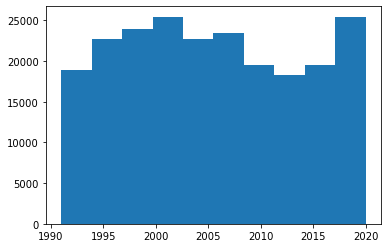

In [11]:
plt.hist(hate_crime['DATA_YEAR'])

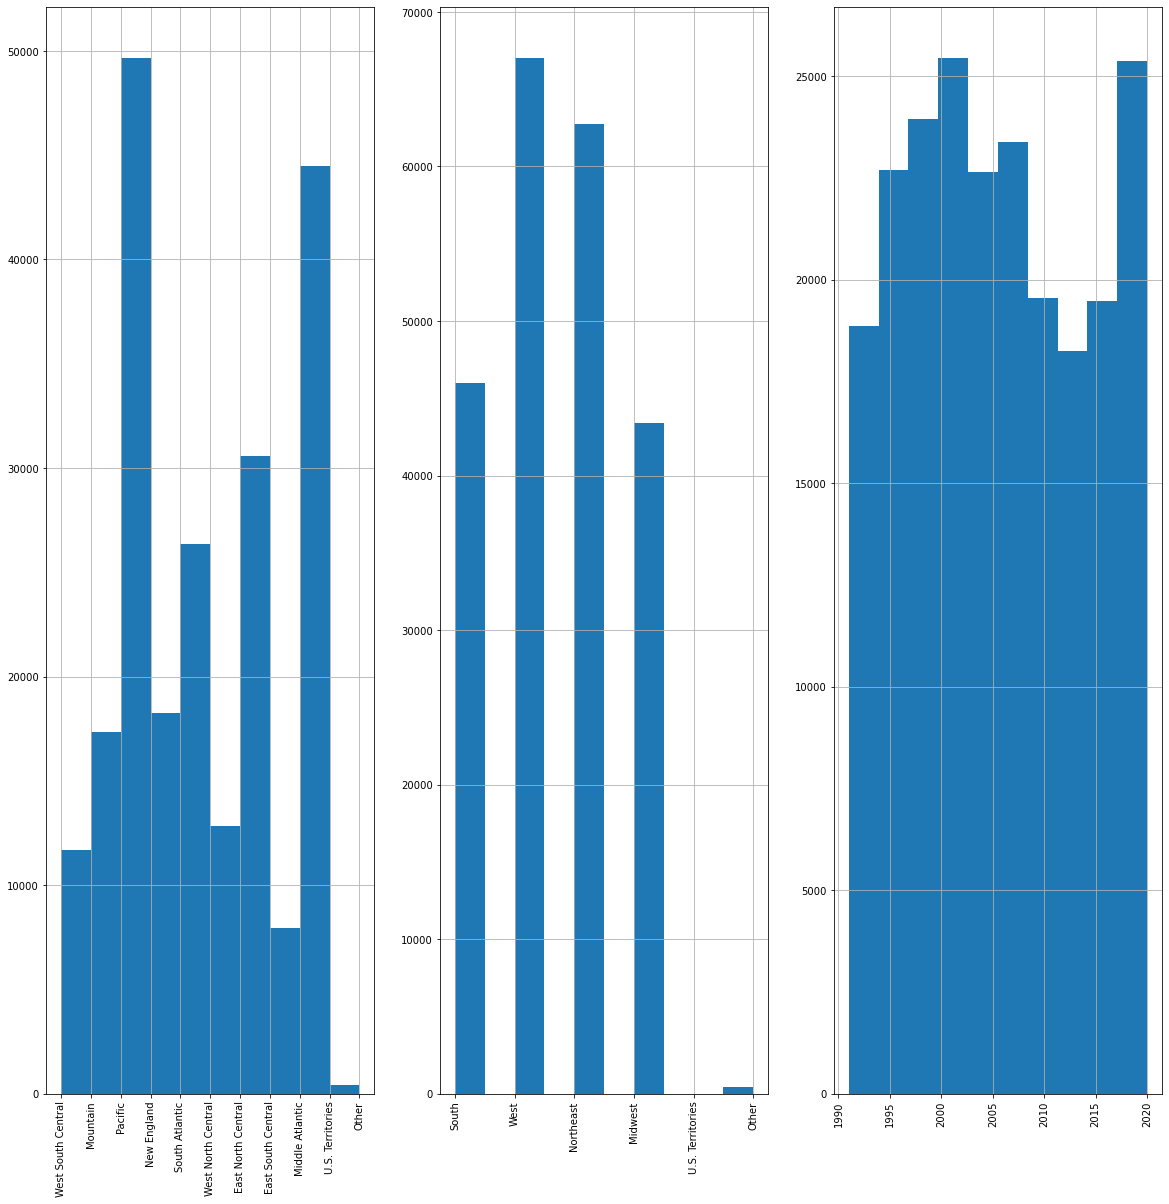

In [61]:
fig, axes = plt.subplots(2,3), figsize=(20,20))

hate_crime['DIVISION_NAME'].hist(ax=axes[0,0])
plt.sca(axes[0,0])
plt.xticks(rotation='vertical')

hate_crime['REGION_NAME'].hist(ax=axes[0,1])
plt.sca(axes[0,1])
plt.xticks(rotation='vertical')

hate_crime['DATA_YEAR'].hist(ax=axes[0,2])
plt.sca(axes[0,2])
plt.xticks(rotation='vertical')

#
hate_crime['DATA_YEAR'].hist(ax=axes[0,2])
plt.sca(axes[0,2])
plt.xticks(rotation='vertical')


plt.show()

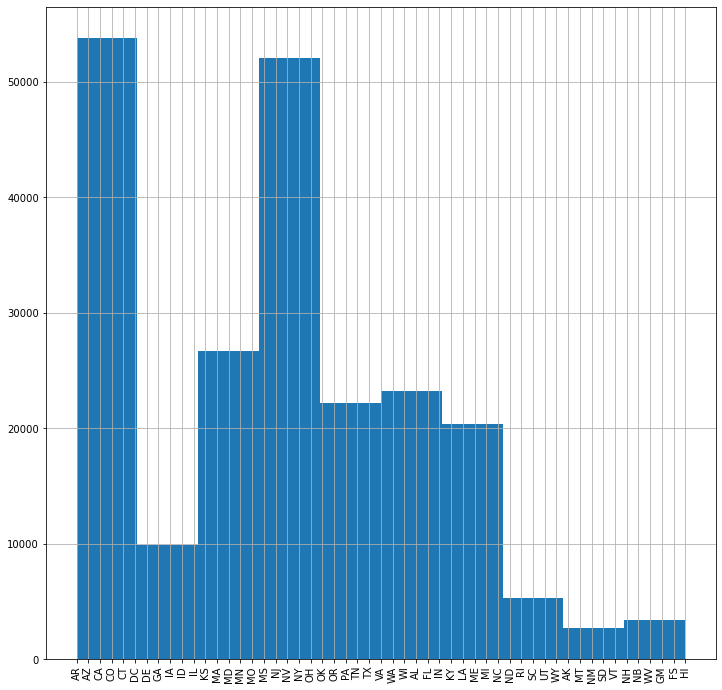

In [60]:
hate_crime['STATE_ABBR'].hist(figsize=(12,12))
plt.xticks(rotation='vertical')
plt.show()